In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import torch

## Configs

In [4]:
first_class_index = 0
num_classes = 1
finetuned_classes = [
  'balloon',
]

model_path = './data/detr-r50_no-class-head.pth'
dataDir = './coco_dataset/balloon_coco/'

## Get the model from here -- 
### DETR R50 
https://github.com/facebookresearch/detr#model-zoo

In [5]:
checkpoint = torch.load('./data/detr-r50-e632da11.pth')

In [6]:
# Remove class weights
del checkpoint["model"]["class_embed.weight"]
del checkpoint["model"]["class_embed.bias"]

# Save
torch.save(checkpoint, model_path)

## Verify the Dataset

In [8]:
import pycocotools.coco as coco
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [11]:
dataType = 'train'
annFile = '{}annotations/custom_train.json'.format(dataDir)
annFile

'./coco_dataset/balloon_coco/annotations/custom_train.json'

In [12]:
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


In [13]:
cats = coco.loadCats(coco.getCatIds())

nms=[cat['name'] for cat in cats]
print('Categories: {}'.format(nms))

nms = set([cat['supercategory'] for cat in cats])
print('Super-categories: {}'.format(nms))

Categories: ['balloon']
Super-categories: {'N/A'}


Image n°56
Image name: ./coco_dataset/balloon_coco//train/154446334_5d41cd1375_b.jpg


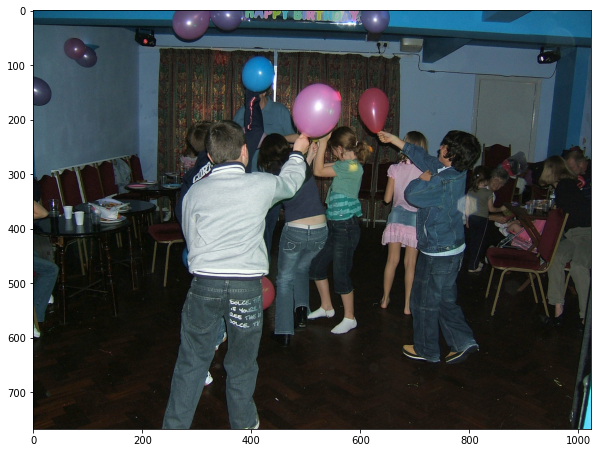

In [14]:
# load and display image
catIds = coco.getCatIds(catNms=['balloon']);
imgIds = coco.getImgIds(catIds=catIds );

img_id = imgIds[np.random.randint(0,len(imgIds))]
print('Image n°{}'.format(img_id))

img = coco.loadImgs(img_id)[0]

img_name = '%s/%s/%s'%(dataDir, dataType, img['file_name'])
print('Image name: {}'.format(img_name))

I = io.imread(img_name)
plt.figure()
plt.imshow(I)

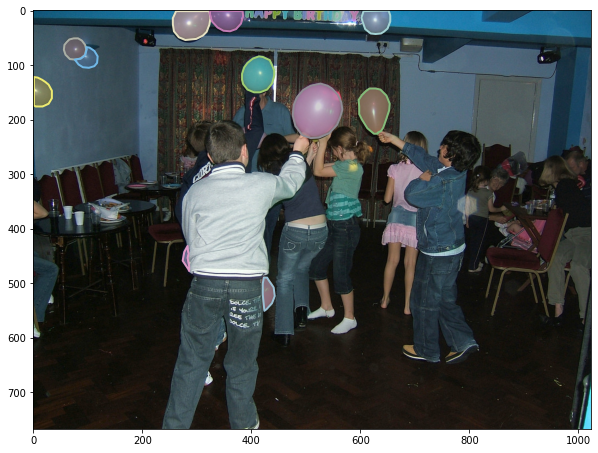

In [15]:
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds)
anns = coco.loadAnns(annIds)

# load and display instance annotations
plt.imshow(I)
coco.showAnns(anns, draw_bbox=False)

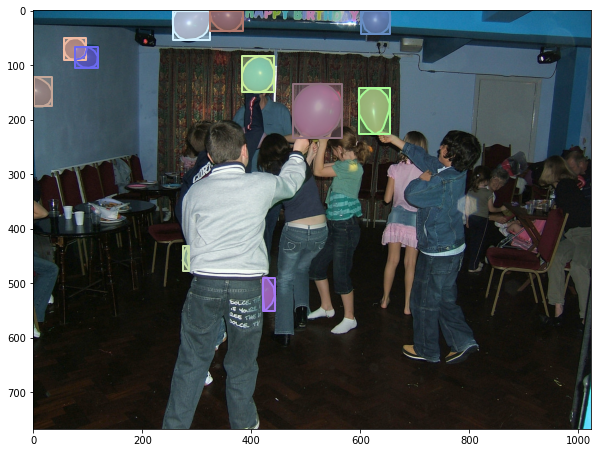

In [16]:
plt.imshow(I)
coco.showAnns(anns, draw_bbox=True)

In [17]:
print('First class index: {}'.format(first_class_index))  
print('Parameter num_classes: {}'.format(num_classes))
print('Fine-tuned classes: {}'.format(finetuned_classes))

First class index: 0
Parameter num_classes: 1
Fine-tuned classes: ['balloon']


## Train DETR model steps

In [18]:
# ! git clone https://github.com/woctezuma/detr.git
# ! cd ./detr/
# ! git checkout finetune ## this might not be necessary

In [36]:
# note training is done from the CLI
# python main.py \
#   --dataset_file "custom" \
#   --coco_path "../coco_dataset/balloon_coco/" \
#   --output_dir "../data/output/" \
#   --resume "../data/detr-r50_no-class-head.pth" \
#   --num_classes 1 \
#   --epochs 100